<a href="https://colab.research.google.com/github/BharathReddyRamasani/AI_DS/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


linear reg

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model=LinearRegression()
x=df[['enginesize']]
y=df['price']
model.fit(x,y)

LinearRegression()

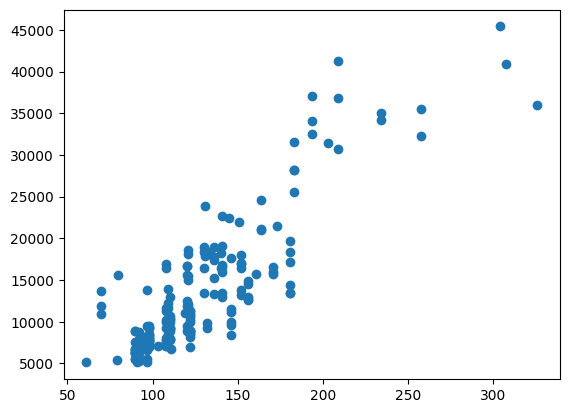

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [ ]:
df['enginesize'].corr(y)

np.float64(0.8741448025245112)

In [ ]:
b0=model.intercept_
b0

np.float64(-8005.445531145204)

In [ ]:
b1=model.coef_[0]
b1

np.float64(167.69841639317215)

In [ ]:
import numpy as np
x_new=np.array([200]).reshape(-1,1)
y_pred=model.predict(x_new)
y_pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25534.23774749])

In [ ]:
print(r2_score(y,model.predict(x)))
print(mean_squared_error(y,model.predict(x)))
print(mean_absolute_error(y,model.predict(x)))

0.7641291357806176
14980261.40555132
2815.022353836411


polynomial reg

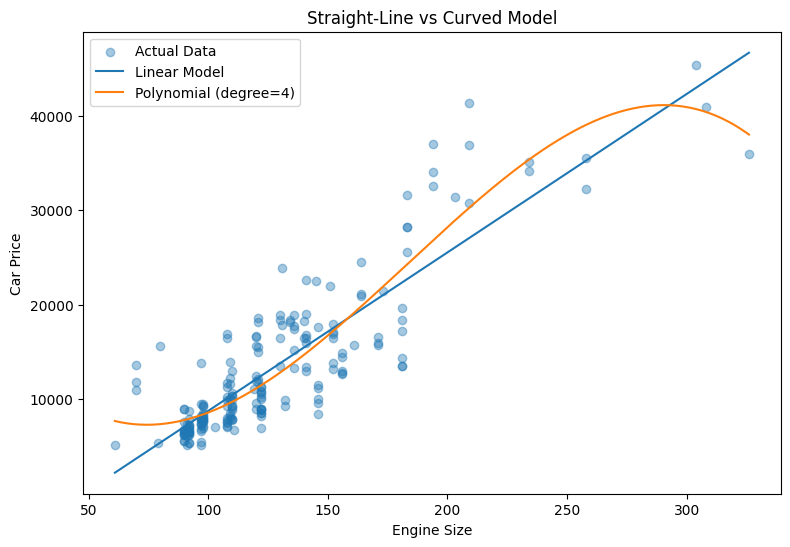

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('linear', LinearRegression())
])
poly_model.fit(x, y)

# Generate smooth x range for plotting
x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

# Plot
plt.figure(figsize=(9, 6))
plt.scatter(x, y, alpha=0.4, label="Actual Data")
plt.plot(x_range, model.predict(x_range), label="Linear Model")
plt.plot(x_range, poly_model.predict(x_range), label="Polynomial (degree=4)")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Straight-Line vs Curved Model")
plt.legend()
plt.show()


In [ ]:
new_engine_size = np.array([[200.0]])

linear_price = model.predict(new_engine_size)
poly_price   = poly_model.predict(new_engine_size)

print("Linear Prediction :", linear_price[0])
print("Polynomial Prediction :", poly_price[0])


Linear Prediction : 25534.237747489227
Polynomial Prediction : 28205.13184850081


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred_linear = model.predict(x)
y_pred_poly   = poly_model.predict(x)


In [ ]:
def regression_metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

linear_metrics = regression_metrics(y, y_pred_linear)
poly_metrics   = regression_metrics(y, y_pred_poly)


In [ ]:
print("Linear Regression Metrics")
for k, v in linear_metrics.items():
    print(f"{k}: {v:.4f}")

print("\nPolynomial Regression (Degree=2) Metrics")
for k, v in poly_metrics.items():
    print(f"{k}: {v:.4f}")


Linear Regression Metrics
MAE: 2815.0224
MSE: 14980261.4056
RMSE: 3870.4343
R2: 0.7641

Polynomial Regression (Degree=2) Metrics
MAE: 2692.9296
MSE: 13091408.8504
RMSE: 3618.2052
R2: 0.7939
